In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats

In [3]:
df = pd.read_csv('dataset.csv', parse_dates=['timestamp'], index_col='timestamp')

df = df.resample('H').sum()

df = df.fillna(method='ffill')

<ipython-input-3-948b3de8628e>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


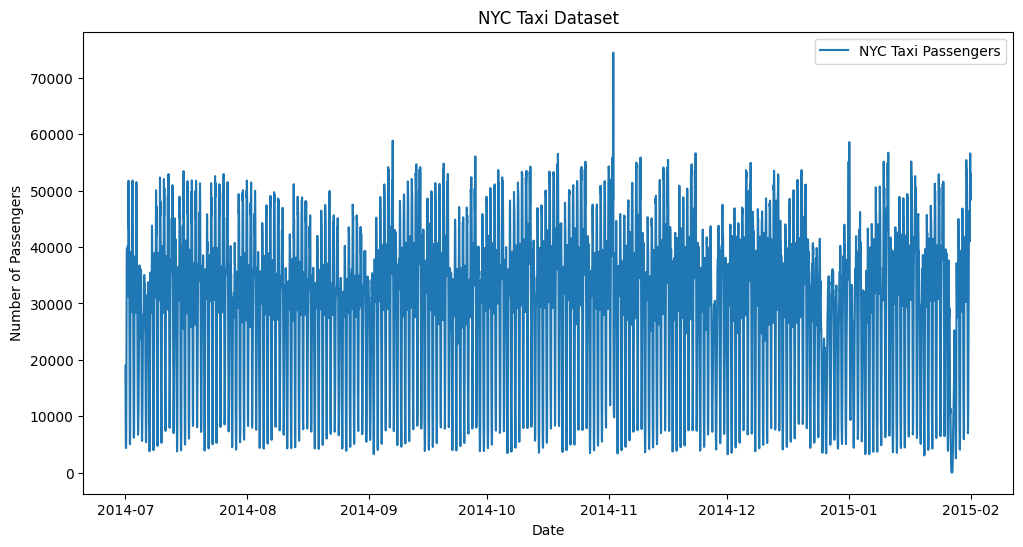

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'], label='NYC Taxi Passengers')
plt.title('NYC Taxi Dataset')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

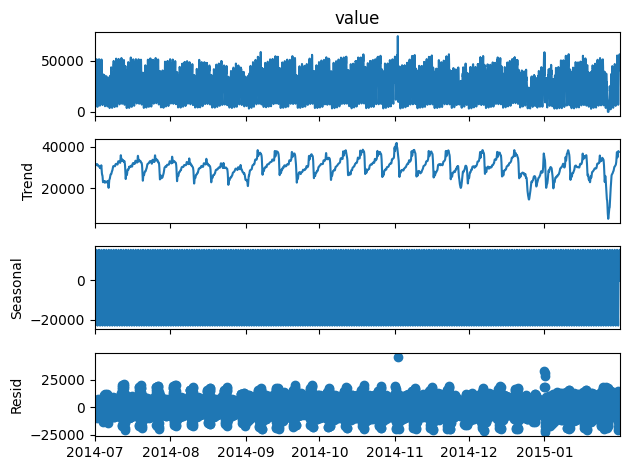

In [5]:
decomposition = seasonal_decompose(df['value'], model='additive')
decomposition.plot()
plt.show()


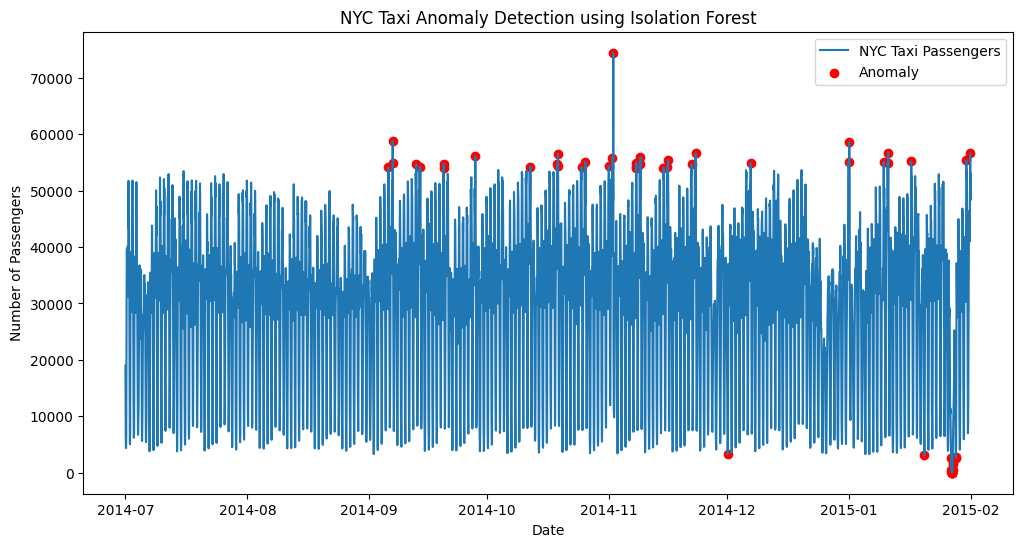

In [6]:
scaler = StandardScaler()
df['value_scaled'] = scaler.fit_transform(df[['value']])

model = IsolationForest(contamination=0.01, random_state=42)
df['anomaly_score'] = model.fit_predict(df[['value_scaled']])

df['anomaly'] = df['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'], label='NYC Taxi Passengers')
plt.scatter(df.index[df['anomaly'] == 1], df['value'][df['anomaly'] == 1], color='red', label='Anomaly', marker='o')
plt.title('NYC Taxi Anomaly Detection using Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()
